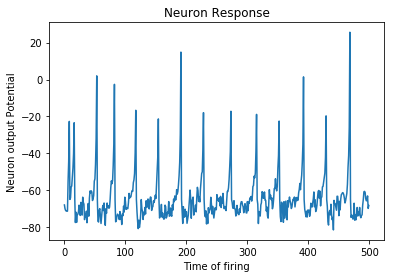

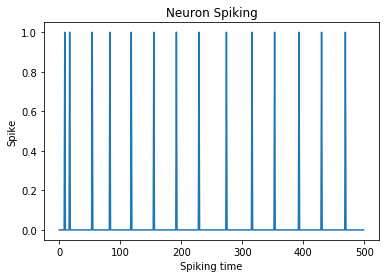

In [1]:
#author = Vinohith
#spiking neuron with pre-synaptic synapses (Izhikevich neuron model)


import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


#initializing some constants
v_threshold = 30        #threshold voltage
time = np.arange(0, 500)#simulation time
input_synapse = 5       #five input synapes to the post-synaptic neuron
output = 1              #one post-synaptic neuron 


#defining the Izhikevich neuron model
class neuron_model:
    def __init__(self, spike_type):
        self.spike_type = spike_type
        self.a = spike_type['a']
        self.b = spike_type['b']
        self.c = spike_type['c']
        self.d = spike_type['d']
        self.v = spike_type['v']
        self.u = self.b * self.v



#creating a dictionary with the various parameters required to produce different types of spikes in the neuron
spike_type = {'regular_spiking' : {'a':0.02, 'b':0.2, 'c':-65, 'd':8, 'v':-65},
 'intrinsically_bursting' : {'a':0.02, 'b':0.2, 'c':-65, 'd':4, 'v':-70},
 'chattering' : {'a':0.02, 'b':0.2, 'c':-50, 'd':2, 'v':-70},
 'fast_spiking' : {'a':0.1, 'b':0.2, 'c':-65, 'd':2, 'v':-65},
 'low_threshold_spiking' : {'a':0.02, 'b':0.25, 'c':-65, 'd':2, 'v':-65}}
 

    
model = neuron_model(spike_type['regular_spiking'])


#defining the out of the neuron model
def out(S, w, a, b, c, d):
    
    t_rest = 5
    v = np.ones((len(time))) * -65  #initializing with resting potential
    u = v * b
    spike = np.zeros(len(time))

    for i, t in enumerate(time):

        if t > t_rest:
            x1 = S[:, i]
            I = np.dot(w, x1)
        else:
            I = 0
        
        #equations governing the working of the Izhikevich neuron model
        v[i] = v[i-1] + (0.04*v[i-1]**2 + 5*v[i-1] + 140 - u[i-1] + I)
        u[i] = u[i-1] + a*(b*v[i] - u[i-1])

        if v[i] >= v_threshold:
            v[i] = c
            u[i] = u[i-1] + d
            spike[i] = 1

    return v, spike


np.random.seed(1)
random.seed(1)
##strength of connections (i.e synaptic weights)
weights = np.random.randint(0, 2, (output, input_synapse))
#value of the signal at the synapses
synapse = []


#generating random synaptic values (signals)
for i in range(input_synapse):
    
    temp = []
    
    for i in range(len(time)):
        
        x = random.randrange(1, 8)
        temp.append(x)
    synapse.append(temp)
    
synapse = np.array(synapse)


#calling the neuron output function defined
output_v, output_spikes = out(synapse, weights, model.a, model.b, model.c, model.d)

#print(output_v)

#ploting the Neuron response vs simulation time
plt.title('Neuron Response')
plt.xlabel('Time of firing')
plt.ylabel('Neuron output Potential')
plt.plot(time, output_v)
plt.show()

#ploting the Neuron spiking vs simulation time
plt.title('Neuron Spiking')
plt.xlabel('Spiking time')
plt.ylabel('Spike')
plt.plot(time, output_spikes)
plt.show()